## Manuel Rubio y Rubén Castillo

In [11]:
# Perceptron multicapa (MLP) con una capa oculta

# Define las funciones de activación
# Implementa el algoritmo de aprendizaje (BP)
# Calcula la salida para unos datos de test [0,2pi]
# Representa la salida estimada y la deseada



import numpy as np

#Definimos las funciones de activación y sus derivadas
def sigmoid_fn(x):
    return 1/(1+np.exp(-x))

def sigmoid_dfn(x):
    s = sigmoid_fn( x )
    return s*(1-s)

def tanh_fn(x):
    return np.tanh(x)

def tanh_dfn(x):
    s = tanh_fn( x )
    return (1-(s*s))

# Elegimos función activación
activation_fn  = tanh_fn
activation_dfn = tanh_dfn

epoch = 0
reportFreq = 100000

learning_rate = 0.1

sample_size = 1   #capa 0 entrada
hidden_size = 15 #capa 1 oculta
output_size = 1   #capa 2 salida

error       = np.zeros( ( output_size, 1 ) )

# Inicializamos pesos y bias de las dos capas (neuronas en filas, entradas en columnas):
layer1_weights = np.random.rand( hidden_size, sample_size )
layer1_bias = np.random.rand( hidden_size, 1 )

layer2_weights = np.random.rand( output_size,hidden_size )
layer2_bias = np.random.rand( output_size, 1 )


# Épocas de entrenamiento (Algoritmo Backpropagation):
while epoch <= 1e6:
    
    #Generación del conjunto de entrenamiento online (sinusoide)
    # Elegimos una muestra de entrada (uniforme [0-2pi]):
    sample_vec = np.random.uniform( 0.0, np.pi * 2.0, ( sample_size, 1 ) )
    # Calculamos la salida (seno(x)):
    output_vec = np.sin( sample_vec )

    # Propagamos hacia adelante (entrada a oculta):
    layer1_sums = np.dot(  layer1_weights,sample_vec ) + layer1_bias

    layer1_outputs = activation_fn(layer1_sums)

    # Propagamos hacia adelante (oculta a salida):
    layer2_sums = np.dot(layer2_weights,layer1_outputs ) + layer2_bias
    layer2_outputs = activation_fn(layer2_sums)

    # Retropropagamos errores (salida a oculta):
    layer2_deltas = -(output_vec-layer2_outputs )*activation_dfn(layer2_sums)

    # Retropropagamos errores (oculta a entrada):
    layer1_deltas = np.dot(layer2_weights.T ,layer2_deltas)*activation_dfn(layer1_sums) 

    # Actualizamos pesos aplicando las deltas (capa 0):
    layer1_weights -= learning_rate*np.dot(layer1_deltas,sample_vec)
    layer1_bias -= learning_rate*layer1_deltas
    
    # Actualizamos pesos aplicando las deltas (capa 1):
    layer2_weights -= learning_rate*(layer2_deltas*layer1_outputs.T)
    layer2_bias -= learning_rate*layer2_deltas

    # Calculamos error para mostrar:
    error += np.absolute( output_vec - layer2_outputs )

    # Mostramos el error:
    if epoch % reportFreq == 0:
        print( "Epoch: %d\nError: %f" % ( epoch, np.sum( error ) / float( sample_size ) / float( reportFreq ) ) )
        error = np.zeros( ( sample_size, 1 ) )

    # Incrementamos la epoca (iteramos)
    epoch += 1



Epoch: 0
Error: 0.000019
Epoch: 100000
Error: 0.139401
Epoch: 200000
Error: 0.028990
Epoch: 300000
Error: 0.024496
Epoch: 400000
Error: 0.023001
Epoch: 500000
Error: 0.022476
Epoch: 600000
Error: 0.022253
Epoch: 700000
Error: 0.022062
Epoch: 800000
Error: 0.022013
Epoch: 900000
Error: 0.021760
Epoch: 1000000
Error: 0.021543


In [12]:
# Test: aplico la red a nuevos datos
x = np.linspace(0.0, np.pi * 2.0, 20)
d = np.sin( x )

y = np.zeros( ( x.size, 1 ) )
for i,sample_vec in enumerate(x):
    # Propagamos hacia adelante (entrada a oculta):
    salida1 = activation_fn(np.dot(layer1_weights, sample_vec ) + layer1_bias)
    # Propagamos hacia adelante (oculta a salida):
    salida2 = activation_fn(np.dot(layer2_weights ,salida1 ) + layer2_bias)
    # Almaceno la salida
    y[i]=salida2


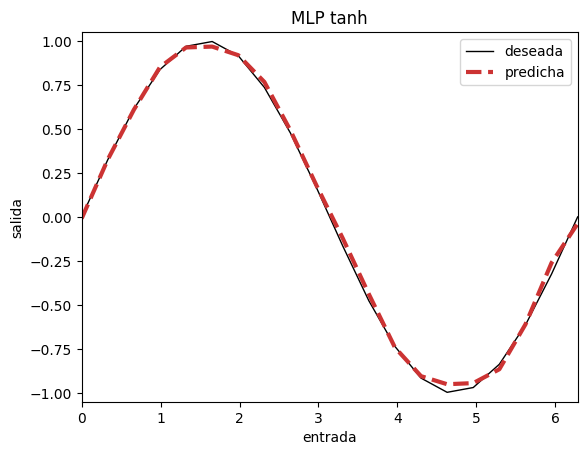

In [13]:
# Representación de la salida estimada
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, d, 'k-', label='deseada', lw=1)
plt.plot(x, y, '--', color=(0.8, 0.2, 0.2), label='predicha', lw=3)

plt.xlim([0.0, x.max(0)])
plt.ylim([-1.05, 1.05])
plt.xlabel('entrada')
plt.ylabel('salida')
plt.title('MLP tanh')
plt.legend(loc="upper right")



### Predice valores fuera del rango de entrenamiento [0,4pi]

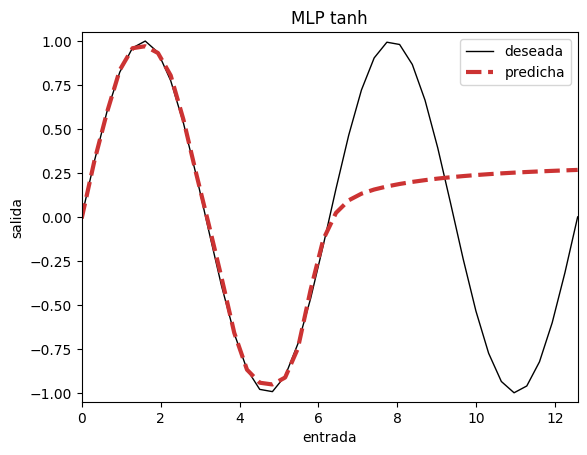

In [14]:
# Test: aplico la red a nuevos datos
x = np.linspace(0.0, np.pi * 4.0, 40)
d = np.sin( x )

y = np.zeros( ( x.size, 1 ) )
for i,sample_vec in enumerate(x):
    # Propagamos hacia adelante (entrada a oculta):
    salida1 = activation_fn(np.dot(layer1_weights, sample_vec ) + layer1_bias)
    # Propagamos hacia adelante (oculta a salida):
    salida2 = activation_fn(np.dot(layer2_weights ,salida1 ) + layer2_bias)
    # Almaceno la salida
    y[i]=salida2


# Representación de la salida estimada
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, d, 'k-', label='deseada', lw=1)
plt.plot(x, y, '--', color=(0.8, 0.2, 0.2), label='predicha', lw=3)

plt.xlim([0.0, x.max(0)])
plt.ylim([-1.05, 1.05])
plt.xlabel('entrada')
plt.ylabel('salida')
plt.title('MLP tanh')
plt.legend(loc="upper right")

Vemos cómo conforme nos alejamos del rango de entrenamiento las predicciones empeoran considerablemente.

### Modifica la constante de adaptación
Si se pone muy pequeña los cambios son tan pocos que no consigue mejorar las soluciones, y si lo aumentamos mucho da saltos entre soluciones malas y tampoco consigue encontrarlas.

### Modifica el número de neuronas en la capa oculta

El resultado es bastante parecido, solo que aumentar neuronas ralentiza considerablemente el proceso

### Emplea la función de activación sigmoide en lugar de tanh 

Epoch: 0
Error: 0.000009
Epoch: 100000
Error: 0.376419
Epoch: 200000
Error: 0.335868
Epoch: 300000
Error: 0.331448
Epoch: 400000
Error: 0.327253
Epoch: 500000
Error: 0.325988
Epoch: 600000
Error: 0.325345
Epoch: 700000
Error: 0.324760
Epoch: 800000
Error: 0.323618
Epoch: 900000
Error: 0.324541
Epoch: 1000000
Error: 0.323294


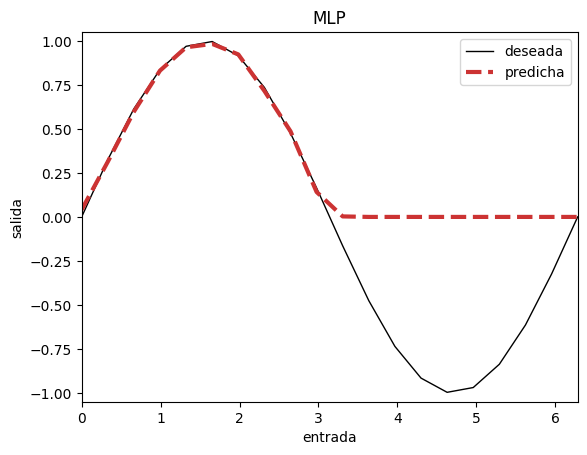

In [15]:
activation_fn  = sigmoid_fn
activation_dfn = sigmoid_dfn

epoch = 0
reportFreq = 100000

learning_rate = 1

sample_size = 1   #capa 0 entrada
hidden_size = 20 #capa 1 oculta
output_size = 1   #capa 2 salida

error       = np.zeros( ( output_size, 1 ) )

# Inicializamos pesos y bias de las dos capas (neuronas en filas, entradas en columnas):
layer1_weights = np.random.rand( hidden_size, sample_size )
layer1_bias = np.random.rand( hidden_size, 1 )

layer2_weights = np.random.rand( output_size,hidden_size )
layer2_bias = np.random.rand( output_size, 1 )


# Épocas de entrenamiento (Algoritmo Backpropagation):
while epoch <= 1e6:
    
    #Generación del conjunto de entrenamiento online (sinusoide)
    # Elegimos una muestra de entrada (uniforme [0-2pi]):
    sample_vec = np.random.uniform( 0.0, np.pi * 2.0, ( sample_size, 1 ) )
    # Calculamos la salida (seno(x)):
    output_vec = np.sin( sample_vec )

    # Propagamos hacia adelante (entrada a oculta):
    layer1_sums = np.dot(  layer1_weights,sample_vec ) + layer1_bias

    layer1_outputs = activation_fn(layer1_sums)

    # Propagamos hacia adelante (oculta a salida):
    layer2_sums = np.dot(layer2_weights,layer1_outputs ) + layer2_bias
    layer2_outputs = activation_fn(layer2_sums)

    # Retropropagamos errores (salida a oculta):
    layer2_deltas = -(output_vec-layer2_outputs )*activation_dfn(layer2_sums)

    # Retropropagamos errores (oculta a entrada):
    layer1_deltas = np.dot(layer2_weights.T ,layer2_deltas)*activation_dfn(layer1_sums) 

    # Actualizamos pesos aplicando las deltas (capa 0):
    layer1_weights -= learning_rate*np.dot(layer1_deltas,sample_vec)
    layer1_bias -= learning_rate*layer1_deltas
    
    # Actualizamos pesos aplicando las deltas (capa 1):
    layer2_weights -= learning_rate*(layer2_deltas*layer1_outputs.T)
    layer2_bias -= learning_rate*layer2_deltas

    # Calculamos error para mostrar:
    error += np.absolute( output_vec - layer2_outputs )

    # Mostramos el error:
    if epoch % reportFreq == 0:
        print( "Epoch: %d\nError: %f" % ( epoch, np.sum( error ) / float( sample_size ) / float( reportFreq ) ) )
        error = np.zeros( ( sample_size, 1 ) )

    # Incrementamos la epoca (iteramos)
    epoch += 1


# Test: aplico la red a nuevos datos
x = np.linspace(0.0, np.pi * 2.0, 20)
d = np.sin( x )

y = np.zeros( ( x.size, 1 ) )
for i,sample_vec in enumerate(x):
    # Propagamos hacia adelante (entrada a oculta):
    salida1 = activation_fn(np.dot(layer1_weights, sample_vec ) + layer1_bias)
    # Propagamos hacia adelante (oculta a salida):
    salida2 = activation_fn(np.dot(layer2_weights ,salida1 ) + layer2_bias)
    # Almaceno la salida
    y[i]=salida2

# Representación de la salida estimada
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, d, 'k-', label='deseada', lw=1)
plt.plot(x, y, '--', color=(0.8, 0.2, 0.2), label='predicha', lw=3)

plt.xlim([0.0, x.max(0)])
plt.ylim([-1.05, 1.05])
plt.xlabel('entrada')
plt.ylabel('salida')
plt.title('MLP')
plt.legend(loc="upper right")

La sigmoide no va nada bien para predecir funciones trigonométricas, al contrario de la tangente hiperbólica.
Para que la solución salga mejor, he utilizado una tasa de aprendizaje mayor, ya que daba mejores resultados.

# Predice valores fuera del rango de entrenamiento [0,4pi]

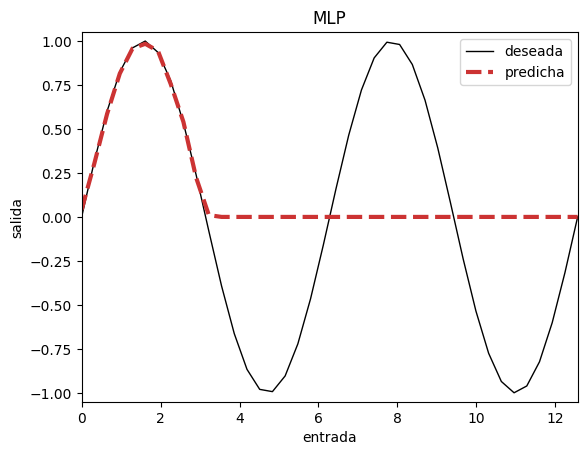

In [16]:
x = np.linspace(0.0, np.pi * 4.0, 40)
d = np.sin( x )

y = np.zeros( ( x.size, 1 ) )
for i,sample_vec in enumerate(x):
    # Propagamos hacia adelante (entrada a oculta):
    salida1 = activation_fn(np.dot(layer1_weights, sample_vec ) + layer1_bias)
    # Propagamos hacia adelante (oculta a salida):
    salida2 = activation_fn(np.dot(layer2_weights ,salida1 ) + layer2_bias)
    # Almaceno la salida
    y[i]=salida2

# Representación de la salida estimada
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, d, 'k-', label='deseada', lw=1)
plt.plot(x, y, '--', color=(0.8, 0.2, 0.2), label='predicha', lw=3)

plt.xlim([0.0, x.max(0)])
plt.ylim([-1.05, 1.05])
plt.xlabel('entrada')
plt.ylabel('salida')
plt.title('MLP')
plt.legend(loc="upper right")

Ya iba mal en el intervalo de entrenamiento, tiene sentido que ocurra lo mismo si lo ampliamos.